In [13]:
#Needed to display images inline in Jupyter
%matplotlib inline  
####################################
from PIL import Image, ImageFilter
import numpy as np
from matplotlib.pyplot import imshow, cm

## Read Image

Call the PIL.Image.open() function to read an image, and you can view the data type and shape (shape, row (height), column (width), color (number of channels)) and other information.

In [2]:
img = Image.open("Lena.png")

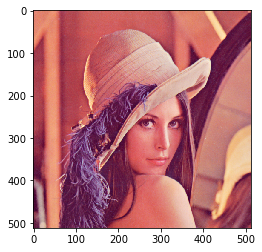

In [3]:
imshow(img)

In [4]:
type(img), img.size

(PIL.PngImagePlugin.PngImageFile, (512, 512))

The data structure type of img is a PngImageFile

The image size is 512×512 (width×height)

In [5]:
img_ary = np.array(img)

Convert the image into numpy ndarray. 

In [6]:
type(img_ary), img_ary.dtype, img_ary.shape

(numpy.ndarray, dtype('uint8'), (512, 512, 3))

The data structure type of img_ary is numpy.ndarray

The data type of each element in img_ary is uint8, meaning that it's 8 bit depth. So the pixel intensity values range from 0 to 255.

The shape of img_ary is 512×512×3, where 3 represents the channel number in RGB space.

Note that the order of color (number of channels) is RGB (red, green, blue) when using Pillow library.

For example,

img_ary[4, 5, 0] is the red component of the pixel in the upper-left corner at coordinates (4, 5)

img_ary[4, 5, 1] is the green component of the pixel in the upper-left corner at coordinates (4, 5)

img_ary[4, 5, 2] is the blue component of the pixel in the upper-left corner at coordinates (4, 5)

We can get the whole pixel like this:

In [7]:
img_ary[4, 5, :]

array([226, 129, 116], dtype=uint8)

## Save Image

Call the PIL.Image.save() function to save an image under the given filename. The format of the output image (JPEG, PNG...) could be determined from the filename extension.

In [8]:
img.save("Lena_copy.jpg")

For numpy ndarray, we need to convert it into a Pillow image and then save it.

In [9]:
img_cvt = Image.fromarray(img_ary)
img_cvt.save("Lena_copy.png")

## RGB Image & Grayscale Image 

When reading a color image using Pillow library, we could explicitly convert the reading mode to "L" to obtain a grayscale image.

In [10]:
img.mode

'RGB'

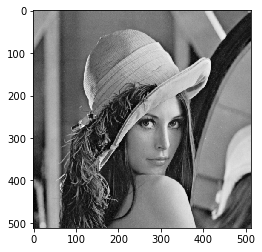

In [14]:
img_gray = img.convert("L")
imshow(img_gray, cmap=cm.gray)

In [15]:
img_gray_ary = np.array(img_gray)
img_gray.mode, img_gray_ary.shape, img_gray_ary[4,5], img_gray_ary.dtype

('L', (512, 512), 157, dtype('uint8'))

RGB image has 3 channels, but grayscale image has only 1 channel.

The value of each pixel is computed using R, G, B values: L = R * 299/1000 + G * 587/1000+ B * 114/1000

For RGB image, we can get the red channel like this:

In [16]:
r = img_ary[:, :, 0]

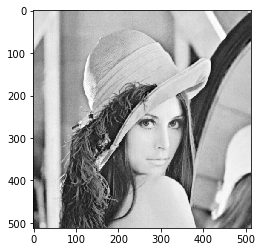

In [17]:
imshow(r, cmap=cm.gray)

In [18]:
r.shape, r[4,5], r.dtype

((512, 512), 226, dtype('uint8'))

Though it looks like gray scale image, it only contains the information of one R channel only. So they are different.

Furthermore, we could generate single-color images by setting other color values to 0, and concatenate them horizontally with np.concatenate(). For each single-color image, it has three channels but only one channel is not all zero.

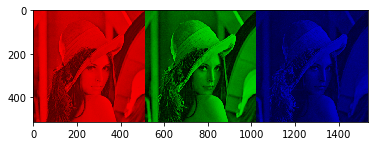

In [19]:
im_R = img_ary.copy()
im_R[:, :, (1, 2)] = 0
im_G = img_ary.copy()
im_G[:, :, (0, 2)] = 0
im_B = img_ary.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
pil_img = Image.fromarray(im_RGB)
imshow(pil_img)

## Quantize Bit Depth

For digital image, the digital value can be quantized further. 

For 8-bit depth image Lena.png, we could quantize it into 4-bit, 2-bit, and even 1-bit.

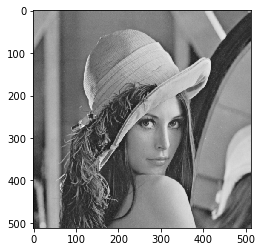

In [20]:
img8 = img_gray.quantize(256) # 8 bit, 256 levels
imshow(img8)


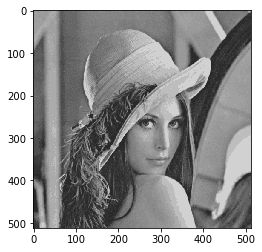

In [21]:
img4 = img_gray.quantize(16) # 4 bit, 16 levels
imshow(img4)

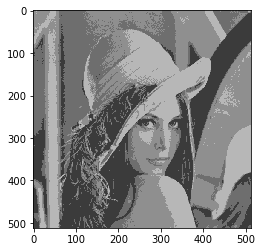

In [22]:
img2 = img_gray.quantize(4) # 2 bit, 4 levels
imshow(img2)

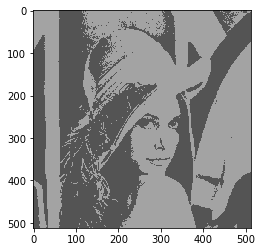

In [23]:
img1 = img_gray.quantize(2) # 1 bit, 2 levels
img1.save("2_bit.png")
imshow(img1)

## Image Downsample

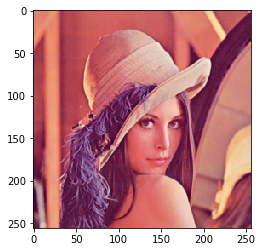

In [24]:
img_50 = img.resize((img.width // 2, img.height // 2))
imshow(img_50)

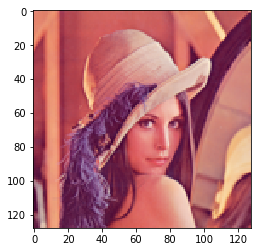

In [25]:
img_25 = img.resize((img.width // 4, img.height // 4))
imshow(img_25)

Though the image is downsampled to its 1/8 size, the quality is not that worse. This is because resampling filter is applied.

## 2D Fourier Transform
To apply 2D FFT on image, we need to first convert image into grayscale, do 2D fourier transform, and then shift FFT to the center. So The further the dots are from the centre, the higher the frequency they represent. 

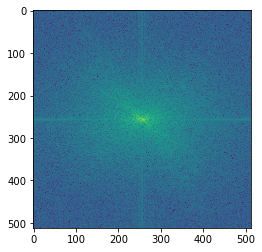

In [26]:
ft = np.fft.fft2(img_gray_ary)
ft = np.fft.fftshift(ft)
imshow(np.log(abs(ft)))

We display the logarithm of the Fourier transform using np.log(), as this allows you to see what’s going on better. Without this change, the constant term at the centre of the Fourier transform would be so much brighter than all the other points that everything else will appear black. You’d be "blinded" by this one, central dot.

## Gaussian Filtering

For a guassian filtering, the radius controls the area to compute the average of pixels using the weight of normal distribution. The larger radius is, the smoother the image is.

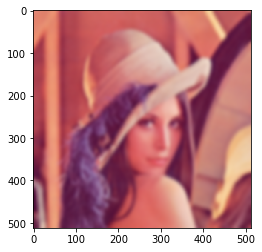

In [27]:
img_guas = img.filter(ImageFilter.GaussianBlur(radius = 4))
imshow(img_guas)